In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_excel("data/Prawomocnie_skazane_osoby_dorosłe_5VbMq3t.xlsx", sheet_name="dane")
df

,nazwa_zmiennej,kraj,plec,grupy_wieku,typ_informacji_z_jednostka_miary,rok,wartosc
0,Prawomocnie skazane osoby dorosłe według czynu...,Polska,kobiety,17-21 lat,wartość [osoba],2019,3526
1,Prawomocnie skazane osoby dorosłe według czynu...,Polska,kobiety,22-24 lat,wartość [osoba],2019,2707
2,Prawomocnie skazane osoby dorosłe według czynu...,Polska,kobiety,25-29 lat,wartość [osoba],2019,4563
3,Prawomocnie skazane osoby dorosłe według czynu...,Polska,kobiety,30-34 lat,wartość [osoba],2019,4644
4,Prawomocnie skazane osoby dorosłe według czynu...,Polska,kobiety,35-39 lat,wartość [osoba],2019,4324
...,...,...,...,...,...,...,...
195,Prawomocnie skazane osoby dorosłe według czynu...,Polska,mężczyźni,40-44 lat,wartość [osoba],2010,34623
196,Prawomocnie skazane osoby dorosłe według czynu...,Polska,mężczyźni,45-49 lat,wartość [osoba],2010,33213
197,Prawomocnie skazane osoby dorosłe według czynu...,Polska,mężczyźni,50-59 lat,wartość [osoba],2010,50834
198,Prawomocnie skazane osoby dorosłe według czynu...,Polska,mężczyźni,60 lat i więcej,wartość [osoba],2010,14453


In [16]:
# Ilość rekordów
df.shape

(200, 7)

In [17]:
# Ilość wartości pustych
df.isna().sum()

nazwa_zmiennej                      0
kraj                                0
plec                                0
grupy_wieku                         0
typ_informacji_z_jednostka_miary    0
rok                                 0
wartosc                             0
dtype: int64

In [18]:
# Usuwamy kolumny 'nazwa_zmiennej' oraz 'typ_informacji_z_jednostka_miary', bo one nic nie wnoszą
df = df.drop(columns=['nazwa_zmiennej', 'typ_informacji_z_jednostka_miary'])
df

,kraj,plec,grupy_wieku,rok,wartosc
0,Polska,kobiety,17-21 lat,2019,3526
1,Polska,kobiety,22-24 lat,2019,2707
2,Polska,kobiety,25-29 lat,2019,4563
3,Polska,kobiety,30-34 lat,2019,4644
4,Polska,kobiety,35-39 lat,2019,4324
...,...,...,...,...,...
195,Polska,mężczyźni,40-44 lat,2010,34623
196,Polska,mężczyźni,45-49 lat,2010,33213
197,Polska,mężczyźni,50-59 lat,2010,50834
198,Polska,mężczyźni,60 lat i więcej,2010,14453


In [56]:
df['rok'] = df['rok'].astype('int')
df['wartosc'] = df['wartosc'].astype('int')

Text(0.5, 1.0, 'Rozkład prawomocnie skazanych osób w poszczególnych latach.')

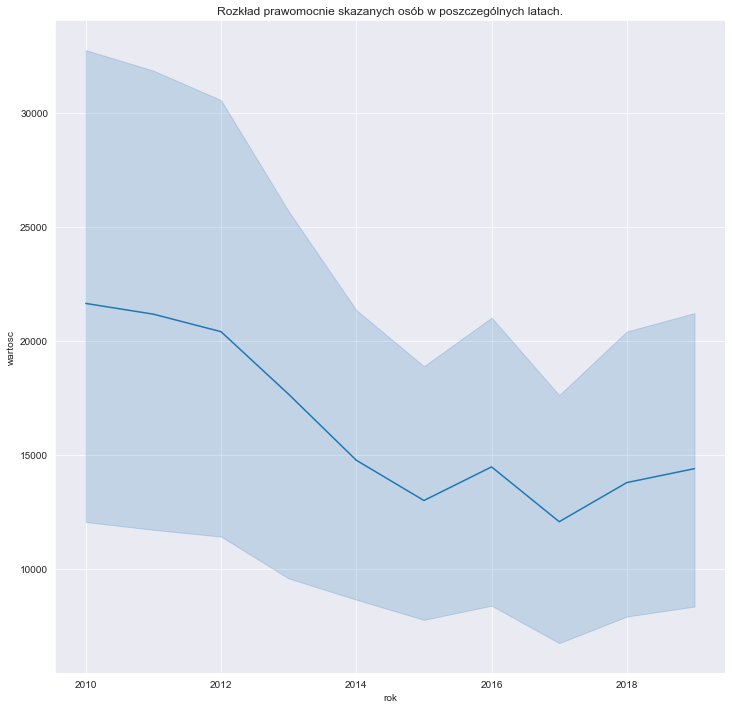

In [64]:
plt.figure(figsize=(12, 12))
ax = sns.lineplot(x='rok', y='wartosc', data=df)
plt.title("Rozkład prawomocnie skazanych osób w poszczególnych latach.")

Text(0.5, 1.0, 'Ilość prawomocnie skazanych osób w podziale na lata i płeć')

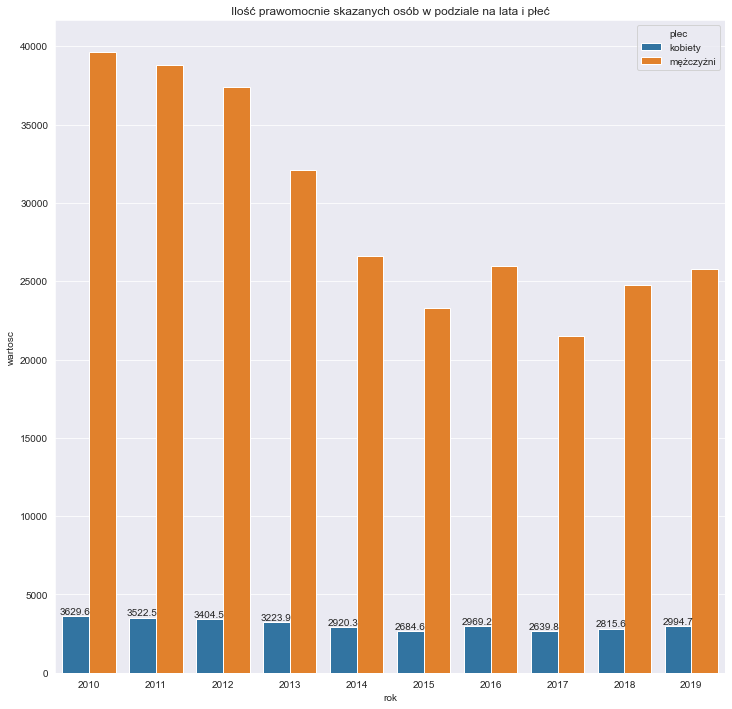

In [58]:
plt.figure(figsize=(12, 12))
ax = sns.barplot(x='rok', y='wartosc', hue='plec', data=df, ci=0)
ax.bar_label(ax.containers[0])
plt.title("Ilość prawomocnie skazanych osób w podziale na lata i płeć")

Text(0.5, 1.0, 'Ilość prawomocnie skazanych kobiet w podziale na grupy wiekowe.')

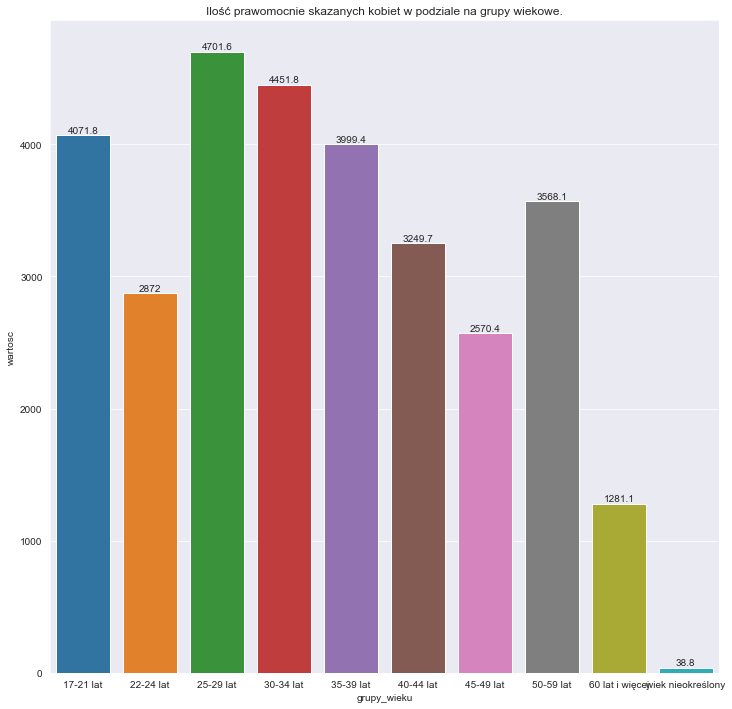

In [59]:
plt.figure(figsize=(12, 12))
ax = sns.barplot(x='grupy_wieku', y='wartosc', data=df[df['plec'] == 'kobiety'], ci=0)
ax.bar_label(ax.containers[0])
plt.title("Ilość prawomocnie skazanych kobiet w podziale na grupy wiekowe.")

Text(0.5, 1.0, 'Ilość prawomocnie skazanych mężczyzn w podziale na grupy wiekowe.')

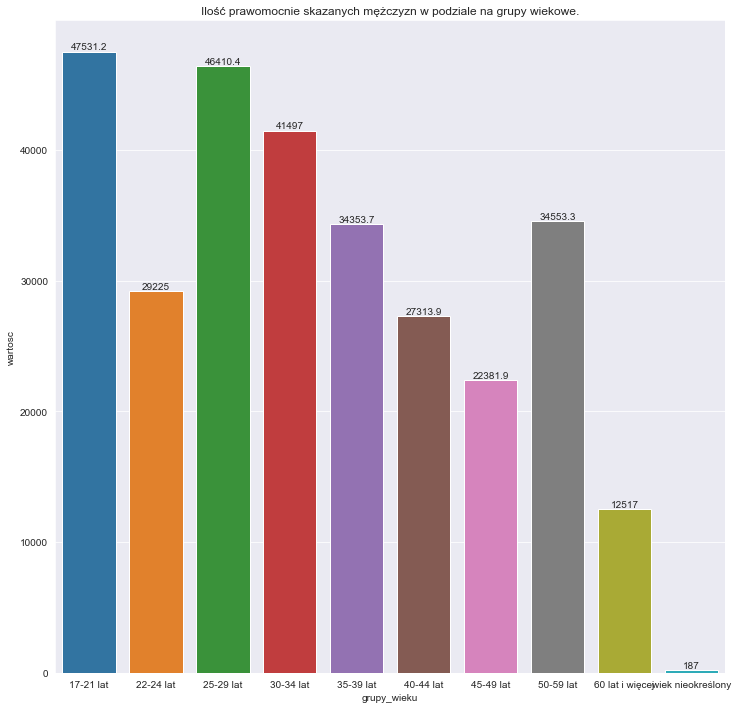

In [60]:
plt.figure(figsize=(12, 12))
ax = sns.barplot(x='grupy_wieku', y='wartosc', data=df[df['plec'] == 'mężczyźni'], ci=0)
ax.bar_label(ax.containers[0])
plt.title("Ilość prawomocnie skazanych mężczyzn w podziale na grupy wiekowe.")

Text(0.5, 1.0, 'Ilość prawomocnie skazanych mężczyzn w podziale na grupy wiekowe.')

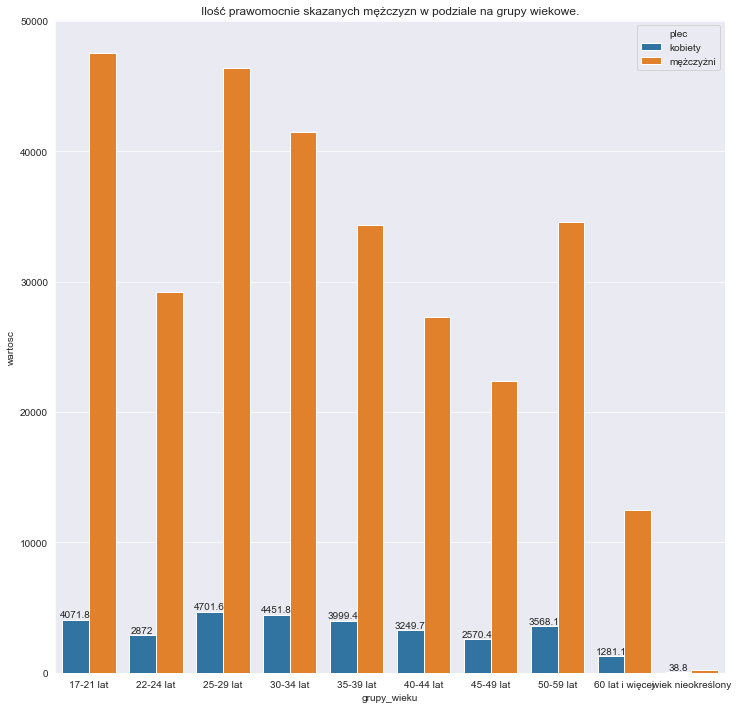

In [62]:
plt.figure(figsize=(12, 12))
ax = sns.barplot(x='grupy_wieku', y='wartosc', hue='plec', data=df, ci=0)
ax.bar_label(ax.containers[0])
plt.title("Ilość prawomocnie skazanych osób w podziale na grupy wiekowe oraz plec.")

In [74]:
# Ilość wszystkich skazanych osób od roku 2010 do 2019
df['wartosc'].sum()

3267751